Linear regression equation in the expanded form:

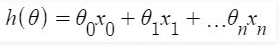

A vectorized form:

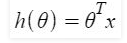

where: θt - transpozed vector of parameters weights


The purpose of this method is to choose the O (theta) parameters above - to minimize the MSE error value. In practice, it is easier to minimize the value of this error (as a function of cost) because the value minimizing the error MSE also minimizes the function.

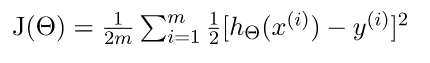

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate random data-set

In [2]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# Gradient descent algorithm

In [3]:
error = []
N = len(x)  # Number of samples

In [34]:
def gradient_descent(b0, b1, lr, iterations):
    for itr in range(iterations):
        error_cost = 0
        cost_b0 = 0
        cost_b1 = 0
        for i in range(N):
            y_pred = (b0 + b1 * x[i])
            error_cost += (y[i] - y_pred) ** 2
            for j in range(N):
                partial_wrt_b0 = -2 * (y[j] - (b0 + b1 * x[j]))  # Partial derivative 1
                partial_wrt_b1 = (-2 * x[j]) * (y[j] - (b0 + b1 * x[j]))  # Partial derivative 2
                cost_b0 += partial_wrt_b0  # calculate cost for each number and add
                cost_b1 += partial_wrt_b1  # calculate cost for each number and add
            b0 -= lr * cost_b0  # Update values
            b1 -= lr * cost_b1  # Update values
        error.append(error_cost)
        
    return b0, b1, error_cost

# Calculate gradient descent with some parameters

In [35]:
b0, b1, error_cost = gradient_descent(b0=0, b1=1, lr=0.001, iterations=300)

You can see that b0 and b1 are very close to exact values: b0 = 2 and b1=3.

In [19]:
def plot_data(x, y, b1, b0):
    plt.scatter(x, y)
    plt.plot(x, b1 * x + b0, color="red", label='Regression line')
    plt.legend(prop={'size': 12})
    plt.show()

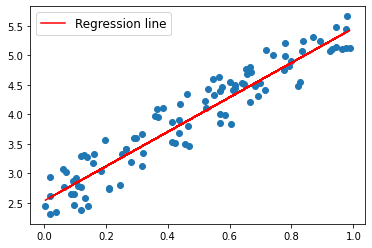

In [20]:
plot_data(x, y, b1, b0)

We can try to change learning rate or number of iteration to see how they affect algorithm. Example values of iterations and learning rate:
it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]

But it is easier to evaluate number of iterations acc. to iteration-error plot.

In [32]:
def eror_iteration_plot(error):
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(1, len(error)+1), error, color="red", linewidth=5)
    plt.xlabel("Iteration vs Error")
    plt.ylabel("Error")
    plt.show()

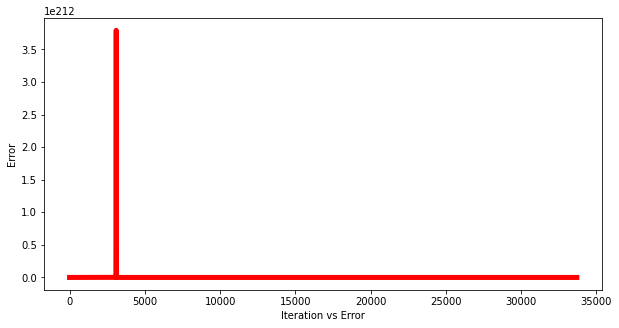

In [33]:
eror_iteration_plot(error)

# Calculate SGD with Mini-Batch

In [ ]:
def stochastic_gradient_descent(b0, b1, lr,k, iterations):
    for itr in range(iterations):
        error_cost = 0
        cost_b0 = 0
        cost_b1 = 0
        
        for i in range(k):
            y_pred = b0 + b1 * x[i]
            error_cost += (y[i] - y_pred) ** 2
            partial_wrt_b0 = -2 * (y[i] - (b0 + b1 * x[i]))  # Partial derivative 1
            partial_wrt_b1 = (-2 * x[i]) * (y[i] - (b0 + b1 * x[i]))  # Partial derivative 2
            b0 -= lr * partial_wrt_b0   # Update values
            b1 -= lr * partial_wrt_b1  # Update values
        error.append(error_cost)
        
    return b0, b1

In [ ]:
stochastic_gradient_descent(b0=0, b1=1, lr=0.001,k=10, iterations=300)

Looking at this graph it is apparent that the error cost after around 200 iterations does not reduce which means we can use only 200 iterations. If we zoom in the graph we can notice this. 
Ps. in presentation I've used 200 iterartion but you can apply it and see that b0 and b1 are not so good as with 300 iterations: sometimes it is good to soom graph or test bigger number of iterations.

soruce : https://medium.com/@shuklapratik22/linear-regression-with-gradient-descent-from-scratch-d03dfa90d04c